In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%cd /content/drive/My Drive/

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
df = pd.read_csv('MNIST_Digit/train.csv')
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Check datatypes, all numeric data
data_type_counts = df.dtypes.value_counts()
print(data_type_counts)

int64    785
Name: count, dtype: int64


In [ ]:
len(df.columns)

785

In [ ]:
#Null Value Columns
nullseries= df.isna().sum()
print(nullseries[nullseries > 0])

Series([], dtype: int64)


In [ ]:
# Describe the data
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


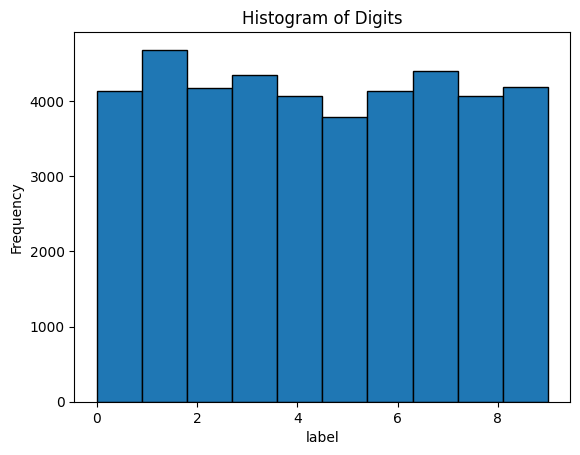

In [ ]:
#Create Histogram
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Bankrupt?' is the column name
plt.hist(df['label'], bins=10, edgecolor='black')  # Assuming binary data, adjust 'bins' as needed
plt.xlabel('label')
plt.ylabel('Frequency')
plt.title('Histogram of Digits')
plt.show()

In [ ]:
# Remove any columns with constant values. They won't contribute to the classifiers
clean_df = df.copy()
black_pixels = []
white_pixels = []
print(len(df.columns))
for pixel in df.columns:
  if max(df[pixel]) == 0:
    black_pixels.append(pixel)
  if min(df[pixel]) == 255:
    white_pixels.append(pixel)

clean_df = clean_df.drop(black_pixels, axis=1)
clean_df = clean_df.drop(white_pixels, axis=1)
print(len(black_pixels))
print(len(white_pixels))
print(len(clean_df.columns))

785
76
0
709


# Split Training and Testing

In [ ]:
x = clean_df.drop(columns=['label'])
y = clean_df['label']

# Use K-Fold Later
from sklearn.model_selection import train_test_split
# Split the dataset into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest Classifier Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Standard Scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


rand_forest = RandomForestClassifier()

# Parameter Grid
param_grid = {
    'n_estimators': [10, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Grid Search
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rand_forest, param_grid, cv=kf, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100]})

In [ ]:
from datetime import datetime

# Train on tuned logistic regression
best_params = grid_search.best_params_
tuned_rand_forest = RandomForestClassifier(**best_params)
start = datetime.now()
tuned_rand_forest.fit(x_train_scaled, y_train)
end = datetime.now()
print(end-start)

# hyperparameter tuning
# 1. n_estimators (number of trees)
# 2. max_features (maximum features considered for splitting a node)
# 3. max_depth (maximum number of levels in each tree)
# 4. splitting criteria (entropy or gini)

0:00:21.677312


In [ ]:
# Random Forest Best Params
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [ ]:
# Predict
rand_forest_y_train_pred = tuned_rand_forest.predict(x_train_scaled)
train_conf_matrix = confusion_matrix(y_train, rand_forest_y_train_pred)
print("Confusion Matrix (Training Data):\n", train_conf_matrix)
print("\nClassification Report (Training Data):\n", classification_report(y_train, rand_forest_y_train_pred))

# On testing data
rand_forest_y_test_pred = tuned_rand_forest.predict(x_test_scaled)
test_conf_matrix = confusion_matrix(y_test, rand_forest_y_test_pred)
print("\nConfusion Matrix (Testing Data):\n", test_conf_matrix)
print("\nClassification Report (Testing Data):\n", classification_report(y_test, rand_forest_y_test_pred))

Confusion Matrix (Training Data):
 [[2918    0    0    0    2    0    3    0    9    0]
 [   0 3271    7    4    3    1    1    4    3    1]
 [   0    5 2820    2   11    0    5   28    4    8]
 [   0    3   20 2909    2   16    4   18   15    9]
 [   0    4    0    0 2754    0    4    4    2   82]
 [   4    6    0    5    2 2675    3    0    8    7]
 [   4    4    1    0    3    4 2865    0    0    0]
 [   0   16   25    1   13    0    0 2945    3   39]
 [   1   18    5    7    5    0    1    1 2784   32]
 [   3   10    0   32   25    4    0   30    8 2845]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2932
           1       0.98      0.99      0.99      3295
           2       0.98      0.98      0.98      2883
           3       0.98      0.97      0.98      2996
           4       0.98      0.97      0.97      2850
           5       0.99      0.99      0.99      2710
           6  

In [ ]:
# import required modules for performance evaluation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

Text(0.5, 427.9555555555555, 'Predicted label')

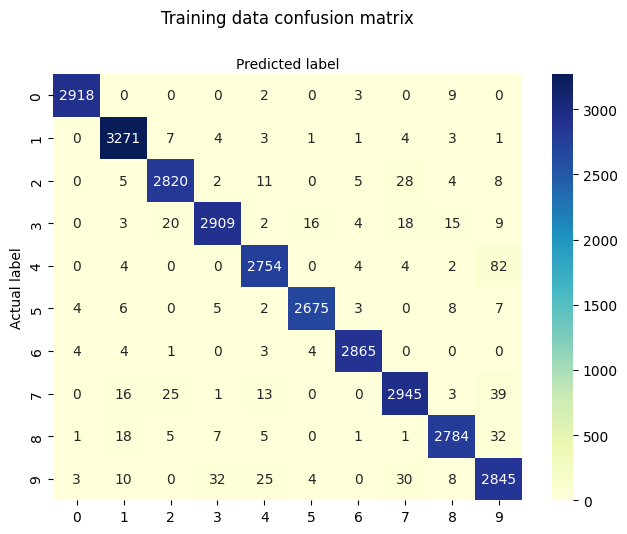

In [ ]:
# Training Data confusion matrix for random forest
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(train_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Training data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

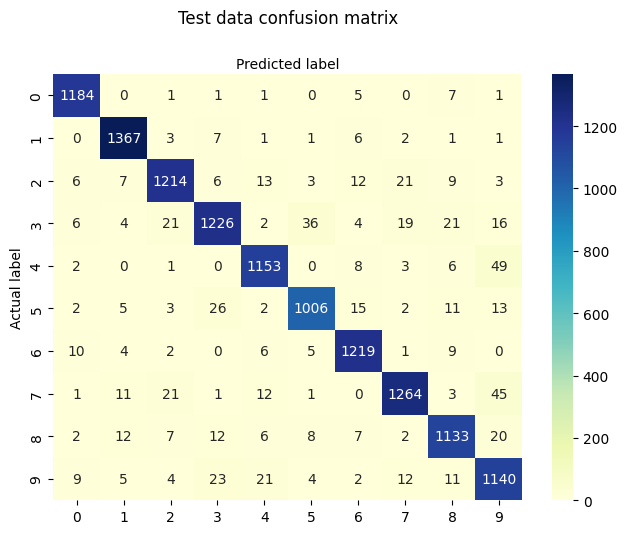

In [ ]:
# Testing Data confusion matrix for random forest
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Test data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Random Forest Classifier Prediction

In [ ]:
test_df = pd.read_csv('MNIST_Digit/test.csv')

In [ ]:
# Remove any columns with constant values. They won't contribute to the classifiers
clean_test_df = test_df.copy()
black_pixels = []
white_pixels = []
for pixel in df.columns:
  if max(df[pixel]) == 0:
    black_pixels.append(pixel)
  if min(df[pixel]) == 255:
    white_pixels.append(pixel)

clean_test_df = clean_test_df.drop(black_pixels, axis=1)
clean_test_df = clean_test_df.drop(white_pixels, axis=1)
print(len(clean_df.columns))
print(len(clean_test_df.columns)) # should be 1 less than clean_df because there is no label column

709
708


In [ ]:
# Standard Scale
scaler = StandardScaler()
predict_scaled = scaler.fit_transform(clean_test_df)

predictions = tuned_rand_forest.predict(predict_scaled)

In [ ]:
imageId = pd.Series(range(1, len(predictions)+1)).astype(int)
result = {'ImageId': imageId, 'Label': predictions}
result_df = pd.DataFrame(result)
result_df.to_csv('MNIST_Digit/rand_forest_prediction.csv',index=False)

# PCA + Random Forest Classifier

In [ ]:
from sklearn.decomposition import PCA
from datetime import datetime

pca = PCA(n_components=0.95)
start = datetime.now()
pca.fit(x_train)
end = datetime.now()
print(end-start)

0:00:12.680576


In [ ]:
x_train_pca_transform = pca.transform(x_train)
x_test_pca_transform = pca.transform(x_test)

print(x_train_pca_transform.shape)
print(x_test_pca_transform.shape)

(29400, 153)
(12600, 153)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Standard Scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_pca_transform)
x_test_scaled = scaler.fit_transform(x_test_pca_transform)

rand_forest = RandomForestClassifier()

# Parameter Grid
param_grid = {
    'n_estimators': [10, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Grid Search
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rand_forest, param_grid, cv=kf, n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100]})

In [ ]:
from datetime import datetime

# Train on tuned logistic regression
best_params = grid_search.best_params_
tuned_rand_forest_pca = RandomForestClassifier(**best_params)
start = datetime.now()
tuned_rand_forest_pca.fit(x_train_scaled, y_train)
end = datetime.now()
print(end-start)

# hyperparameter tuning
# 1. n_estimators (number of trees)
# 2. max_features (maximum features considered for splitting a node)
# 3. max_depth (maximum number of levels in each tree)
# 4. splitting criteria (entropy or gini)

0:01:34.620560


In [ ]:
# Random Forest w/PCA Best Params
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [ ]:
# Predict
rand_forest_pca_y_train_pred = tuned_rand_forest_pca.predict(x_train_scaled)
train_conf_matrix = confusion_matrix(y_train, rand_forest_pca_y_train_pred)
print("Confusion Matrix (Training Data):\n", train_conf_matrix)
print("\nClassification Report (Training Data):\n", classification_report(y_train, rand_forest_pca_y_train_pred))

# On testing data
rand_forest_pca_y_test_pred = tuned_rand_forest_pca.predict(x_test_scaled)
test_conf_matrix = confusion_matrix(y_test, rand_forest_pca_y_test_pred)
print("\nConfusion Matrix (Testing Data):\n", test_conf_matrix)
print("\nClassification Report (Testing Data):\n", classification_report(y_test, rand_forest_pca_y_test_pred))

Confusion Matrix (Training Data):
 [[2898    0    2    6    1    1   13    1    9    1]
 [   1 3256   10   11    0    2    6    4    5    0]
 [   7    6 2788    9    7    0    1   16   45    4]
 [   0    1   27 2896    1   11    5   12   32   11]
 [   1    4    7    0 2793    0    6    4    5   30]
 [   8    0    1   18    2 2656   11    1    9    4]
 [   6    0    4    1    4    9 2855    0    1    1]
 [   0   12   32    2    3    0    0 2963   10   20]
 [   4   14   11   39    6   23    5    6 2733   13]
 [   1    1    2   31   23    4    0   26   17 2852]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2932
           1       0.99      0.99      0.99      3295
           2       0.97      0.97      0.97      2883
           3       0.96      0.97      0.96      2996
           4       0.98      0.98      0.98      2850
           5       0.98      0.98      0.98      2710
           6  

In [ ]:
# import required modules for performance evaluation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

Text(0.5, 427.9555555555555, 'Predicted label')

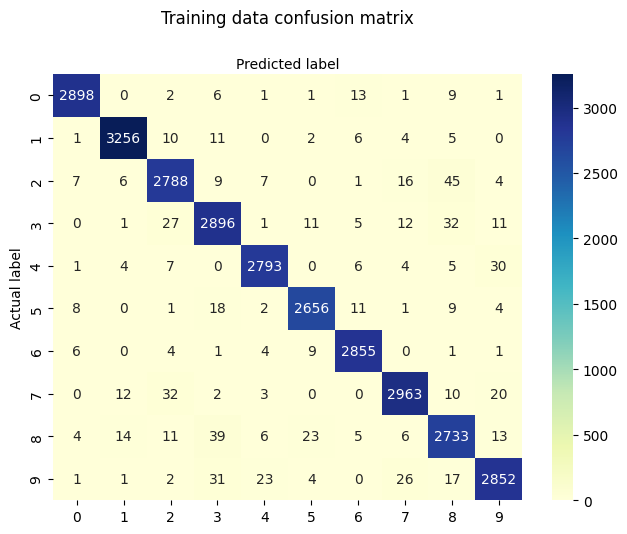

In [ ]:
# Training Data confusion matrix for random forest
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(train_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Training data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

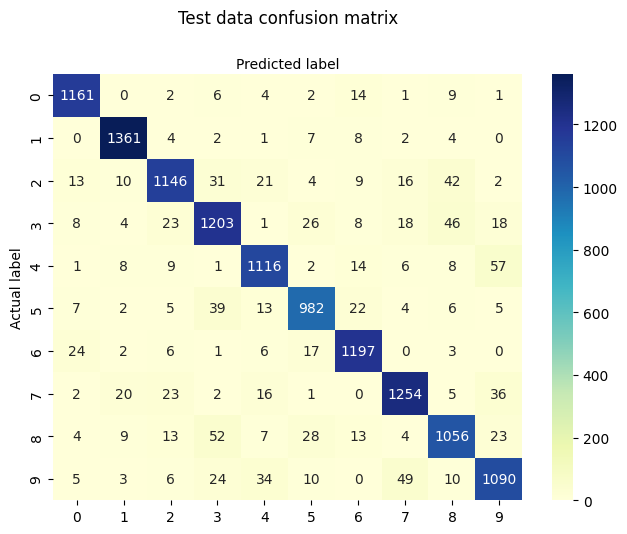

In [ ]:
# Testing Data confusion matrix for random forest
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Test data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# PCA + Random Forest Classifier Prediction

In [ ]:
test_df = pd.read_csv('MNIST_Digit/test.csv')

In [ ]:
# Remove any columns with constant values. They won't contribute to the classifiers
clean_test_df = test_df.copy()
black_pixels = []
white_pixels = []
for pixel in df.columns:
  if max(df[pixel]) == 0:
    black_pixels.append(pixel)
  if min(df[pixel]) == 255:
    white_pixels.append(pixel)

clean_test_df = clean_test_df.drop(black_pixels, axis=1)
clean_test_df = clean_test_df.drop(white_pixels, axis=1)
print(len(clean_df.columns))
print(len(clean_test_df.columns)) # should be 1 less than clean_df because there is no label column

709
708


In [ ]:
# Standard Scale
pca_clean_test_df = pca.transform(clean_test_df)
scaler = StandardScaler()
predict_scaled = scaler.fit_transform(pca_clean_test_df)

predictions = tuned_rand_forest_pca.predict(predict_scaled)

In [ ]:
imageId = pd.Series(range(1, len(predictions)+1)).astype(int)
result = {'ImageId': imageId, 'Label': predictions}
result_df = pd.DataFrame(result)
result_df.to_csv('MNIST_Digit/rand_forest_pca_prediction.csv',index=False)

## **K-Mean Clustering**

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from sklearn.metrics import silhouette_score

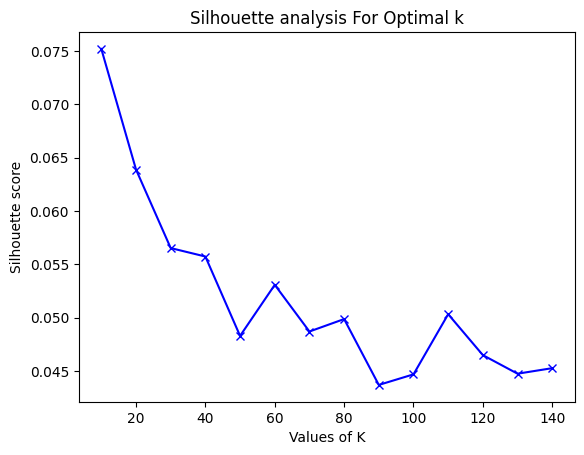

In [ ]:
range_n_clusters = np.arange(100,500, 100)
silhouette_avg = []
for num_clusters in range_n_clusters:

 # initialise kmeans
 kmeans = MiniBatchKMeans(n_clusters=num_clusters, n_init='auto')
 kmeans.fit(x_train)
 cluster_labels = kmeans.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(x_train, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

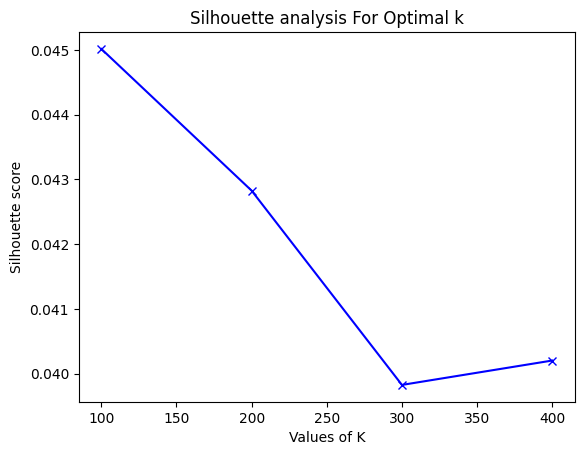

In [ ]:
range_n_clusters = np.arange(100,500, 100)
silhouette_avg = []
for num_clusters in range_n_clusters:

 # initialise kmeans
 kmeans = MiniBatchKMeans(n_clusters=num_clusters, n_init='auto')
 kmeans.fit(x_train)
 cluster_labels = kmeans.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(x_train, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
kmeans = MiniBatchKMeans(n_clusters = 2000, random_state=42,n_init='auto')
# Fit the model to the training data
kmeans.fit(x_train)
kmeans.labels_

array([1543,  358,  710, ..., 1037,   97,  980], dtype=int32)

In [ ]:
# Majority Vote method to map k-mean label to actual y label
from collections import defaultdict

cluster_labels_train = kmeans.labels_

cluster_to_label = defaultdict(lambda: defaultdict(int))
for cluster_label, true_label in zip(cluster_labels_train, y_train):
    cluster_to_label[cluster_label][true_label] += 1

# Step 4: Assign cluster labels based on the best match
cluster_majority_label = {}
for cluster_label, label_counts in cluster_to_label.items():
    majority_label = max(label_counts, key=label_counts.get)
    cluster_majority_label[cluster_label] = majority_label

y_pred = np.array([cluster_majority_label[cluster_label] for cluster_label in cluster_labels_train])

In [ ]:
print(y_pred[:20])
print(y_train[:20])

[6 5 3 4 7 8 6 7 0 9 9 7 6 9 9 3 1 6 3 0]
34941    6
24433    5
24432    3
8832     4
30291    7
28009    8
27876    6
120      7
30457    0
4634     9
13579    9
16089    7
7438     6
6879     9
9480     9
11189    3
30759    1
18444    6
11788    3
17052    0
Name: label, dtype: int64


In [ ]:
# import required modules for performance evaluation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Predict
train_conf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix (Training Data):\n", train_conf_matrix)

Confusion Matrix (Training Data):
 [[3269    0    7    2    1   10   21    0    4    2]
 [   1 3721   14    4    5    4    6    7    3   10]
 [  26    9 3179   20    4    2   14   42   27    8]
 [   4    6   36 3185    2   72    8   14   64   23]
 [   1   21    5    0 3015    0   27   24    2  138]
 [   9    4   12  114   11 2849   49    1   29   15]
 [  14    5    7    0    5   16 3298    0    7    0]
 [   2   29   28    2   31    0    0 3273    8  135]
 [  12   17   22   67   34  115   22    8 2891   40]
 [   6    5   11   17  143   25    6   68   19 3050]]


Text(0.5, 427.9555555555555, 'Predicted label')

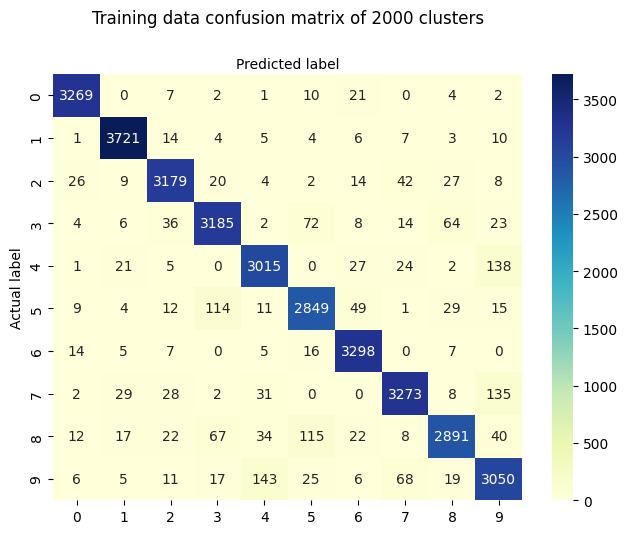

In [ ]:
# Training Data confusion matrix for random forest
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(train_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title(f'Training data confusion matrix of {len(set(kmeans.labels_))} clusters', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Assuming you already have y_train and y_pred

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(y_train, y_pred)

# Calculate Normalized Mutual Information
nmi = normalized_mutual_info_score(y_train, y_pred)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: 0.8832843829515762
Normalized Mutual Information: 0.8719751665793185


In [ ]:
# Check on testing data
cluster_labels_test = kmeans.predict(x_test)
y_pred_test = np.array([cluster_majority_label[cluster_label] for cluster_label in cluster_labels_test])

test_conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix (Training Data):\n", test_conf_matrix)

Confusion Matrix (Training Data):
 [[806   0   1   0   1   1   7   0   0   0]
 [  0 900   1   0   3   1   2   1   0   1]
 [ 10   8 784   5   3   3   6  15   8   4]
 [  0   3   6 867   1  25   1   5  20   9]
 [  3   2   1   0 770   1  10   2   1  49]
 [  0   1   1  18   0 661   9   1   8   3]
 [  5   1   0   0   1   2 774   0   2   0]
 [  0  14  10   0   3   0   0 817   2  47]
 [  1   4   5  22   8  29   4   2 749  11]
 [  4   4   3   5  26   8   1  23   6 758]]


Text(0.5, 427.9555555555555, 'Predicted label')

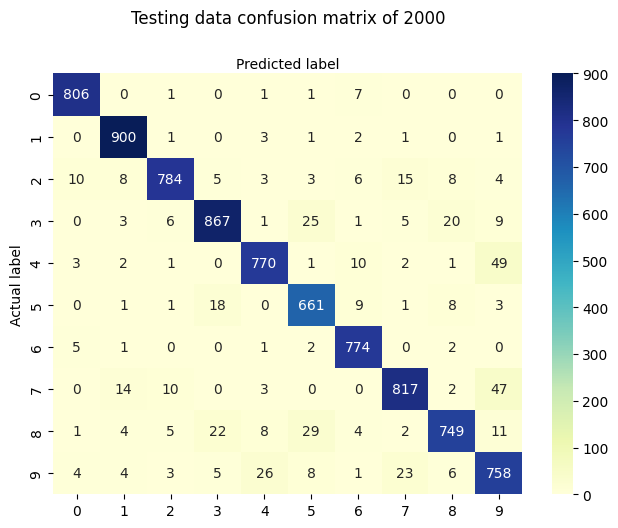

In [ ]:
# Training Data confusion matrix for random forest
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title(f'Testing data confusion matrix of {len(set(kmeans.labels_))}', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **K-Means Prediction on Test Dataset**

In [ ]:
# Make prediction on test dataset
test_df = pd.read_csv('MNIST_Digit/test.csv')

In [ ]:
# Remove any columns with constant values. They won't contribute to the classifiers
clean_test_df = test_df.copy()
black_pixels = []
white_pixels = []
for pixel in df.columns:
  if max(df[pixel]) == 0:
    black_pixels.append(pixel)
  if min(df[pixel]) == 255:
    white_pixels.append(pixel)

clean_test_df = clean_test_df.drop(black_pixels, axis=1)
clean_test_df = clean_test_df.drop(white_pixels, axis=1)
print(len(clean_df.columns))
print(len(clean_test_df.columns)) # should be 1 less than clean_df because there is no label column

709
708


In [ ]:
# predict test data label
cluster_labels_final = kmeans.predict(clean_test_df)
y_pred_final = np.array([cluster_majority_label[cluster_label] for cluster_label in cluster_labels_final])

In [ ]:
imageId = pd.Series(range(1, len(y_pred_final)+1)).astype(int)
result = {'ImageId': imageId, 'Label': y_pred_final}
result_df = pd.DataFrame(result)
result_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [ ]:
result_df.to_csv('MNIST_Digit/kmeans_prediction_2000.csv',index=False)